# Code de parcours de graphe

## Graphe de test

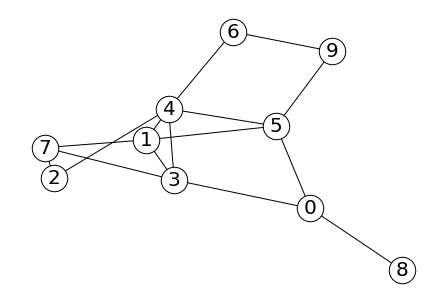

In [2]:
import networkx as nx

options = {
    "font_size": 20,
    "node_size": 700,
    "edgecolors": "black",
}
G = nx.fast_gnp_random_graph(10, 0.35)
nx.draw(G, with_labels= True, node_color= "white", **options)


## Parcours en profondeur

In [3]:
def dfs(G, s):
    visited = [False]*len(G)
    def aux(u):
        if not visited[u]:
            print(u, end=" ")
            visited[u] = True
            for v in G[u]:
                aux(v)
    aux(s)

dfs(G, 0) # affichage des sommets dans un ordre de parcours en profondeur

0 3 1 4 2 7 5 9 6 8 


## Animation

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML

def anim_traversal(G, traversal):
    for i,e in enumerate(G.edges):
        G.edges[e]['index'] = i
    colors, widths = traversal(G)
    fig, ax = plt.subplots(figsize=(20,12))
    pos = nx.spring_layout(G)
    plt.close()
    def update(frame):
        ax.clear()
        nx.draw(G, pos, ax, width=widths[frame], node_color=colors[frame], **options)
    ani = matplotlib.animation.FuncAnimation(fig, update, frames=len(colors), interval=800, repeat=True)
    return HTML(ani.to_jshtml())

## Parcours en profondeur

In [6]:
def dfs(G):
    colors, widths = ['black']*len(G), [1]*len(G.edges)
    frame_colors, frame_widths = [], []
    def add_frame():
        frame_colors.append(colors.copy())
        frame_widths.append(widths.copy())
    def aux(u):
        colors[u] = 'red'
        add_frame()
        for v in G.neighbors(u):
            if colors[v] == 'black':
                colors[u] = 'orange'
                widths[G[u][v]['index']] = 5
                aux(v)
                colors[u] = 'red'
                add_frame()
        colors[u] = 'green'
        add_frame()
    aux(0)
    return frame_colors, frame_widths

In [7]:
anim_traversal(G, dfs)

## Parcours en largeur

In [6]:
from collections import deque

def bfs(G):
    colors, widths = ['black']*len(G), [1]*len(G.edges)
    frame_colors, frame_widths = [], []
    def add_frame():
        frame_colors.append(colors.copy())
        frame_widths.append(widths.copy())
    q = deque([(0, -1)])
    while len(q) > 0:
        u, p = q.pop()
        if p != -1:
            widths[G[p][u]['index']] = 5
        colors[u] = 'green'
        add_frame()
        for v in G.neighbors(u):
            if colors[v] == 'black':
                colors[v] = 'orange'
                q.appendleft((v, u))
        add_frame()
    return frame_colors, frame_widths

In [7]:
G = nx.fast_gnp_random_graph(10, 0.35)
anim_traversal(G, bfs)

## Génération d'un labyrinthe par parcours en profondeur

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import random

def generate_labyrinth(n, p):
    G = nx.Graph()
    G.add_nodes_from((i, j) for i in range(n) for j in range(p))
    visited = [[False]*p for _ in range(n)]
    def dfs(i, j):
        visited[i][j] = True
        neighbors = [(i+1, j), (i-1, j), (i, j+1), (i, j-1)]
        random.shuffle(neighbors)
        for x, y in neighbors:
            if 0 <= x < n and 0 <= y < p and not visited[x][y]:
                G.add_edge((i, j), (x, y))
                dfs(x, y)
    dfs(0, 0)
    return G

def draw(G, **keywords):
    plt.clf()
    nx.draw(G, pos={p: p for p in G.nodes()}, node_size=20, **keywords)
    plt.show()

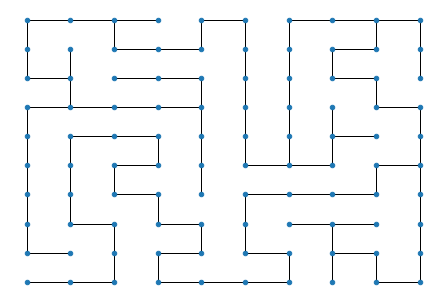

In [ ]:
n = 10
G = generate_labyrinth(n, n)
draw(G)

## Résolution du labyrinthe avec parcours en profondeur

On cherche un chemin du sommet en bas à gauche (entrée) au sommet en haut à droite (sortie).  
Pour cela, on peut effectuer un parcours en profondeur depuis le sommet en bas à gauche (de coordonnées $(0, 0)$ avec les conventions `networkx`) et on s'arrête dès qu'on trouve la sortie :

In [ ]:
def solve_labyrinth(G, n):
    visited = [[False]*n for _ in range(n)]
    path = []
    for i,e in enumerate(G.edges):
        G.edges[e]['index'] = i
    def dfs(i, j):
        if i == n - 1 == j:
            return True
        visited[i][j] = True
        neighbors = [(i+1, j), (i-1, j), (i, j+1), (i, j-1)]
        random.shuffle(neighbors)
        for x, y in neighbors:
            if 0 <= x < n and 0 <= y < n and (x, y) in G[(i, j)] and not visited[x][y]:
                if dfs(x, y):
                    path.append(G[(i, j)][(x, y)]['index'])
                    return True
        return False
    dfs(0, 0)
    return path

In [ ]:
path = solve_labyrinth(G, n)
widths = [4 if i in path else 1 for i in range(len(G.edges))]
draw(G, width=widths)

## Animation de parcours du labyrinthe

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML

def anim_traversal(G, widths):
    fig, ax = plt.subplots(figsize=(20,12))
    plt.close()
    def update(frame):
        ax.clear()
        nx.draw(G, ax=ax, pos={p: p for p in G.nodes()}, node_size=700, width=widths[frame])
    ani = matplotlib.animation.FuncAnimation(fig, update, frames=len(widths), interval=80)
    return HTML(ani.to_jshtml(default_mode="once"))

In [ ]:
def solve_labyrinth(G, n):
    widths = [1]*len(G.edges)
    visited = [[False]*n for _ in range(n)]
    frame_widths = []
    for i,e in enumerate(G.edges):
        G.edges[e]['index'] = i
    def dfs(i, j):
        if i == n - 1 == j:
            return True
        visited[i][j] = True
        neighbors = [(i+1, j), (i-1, j), (i, j+1), (i, j-1)]
        random.shuffle(neighbors)
        for x, y in neighbors:
            if 0 <= x < n and 0 <= y < n and (x, y) in G[(i, j)] and not visited[x][y]:
                widths[G[(i, j)][(x, y)]['index']] = 6
                frame_widths.append(widths.copy())
                if dfs(x, y):
                    return True
                widths[G[(i, j)][(x, y)]['index']] = 1
                frame_widths.append(widths.copy())
        return False
    dfs(0, 0)
    return frame_widths

In [ ]:
anim_traversal(G, solve_labyrinth(G, n))